# Homework 5

# Задача №1 - Можете ли вы отличить сорняки от рассады?

Теперь приступим к задаче классификации на картинках. Реализуйте программу, которая определяет тип рассады на изображении. 

Для того, чтобы определить характерные особенности каждого типа рассады, у вас есть train. Train это папка, в которой картинки уже классифицированы и лежат в соответствующих папках. Исходя из этой информации можете найти признаки, присущие конкретному растению.

Проверка вашего решения будет на происходить на test. В папке test уже нет метки класса для каждой картинки. 

[Ссылка на Яндекс-диск](https://yadi.sk/d/0Zzp0klXT0iRmA), все картинки тут.

Примеры изображений для теста:
<table><tr>
    <td> <img src="https://i.ibb.co/tbqR37m/fhj.png" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/6yL3Wmt/sfg.png" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/pvn7NvF/asd.png" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [24]:
import numpy as np
import torch
import os
import cv2

from PIL import Image
from pathlib import Path

from matplotlib import pyplot as plt
%matplotlib inline

TRAIN_DIR = Path('./../../../plants/train')
TEST_DIR = Path('./../../../plants/test')

train_files = sorted(list(TRAIN_DIR.rglob('*.png')))
test_files = sorted(list(TEST_DIR.rglob('*.png')))

In [56]:
classes = ['Maize', 'Scentless Mayweed', 'Small-flowered Cranesbill', 'Loose Silky-bent']

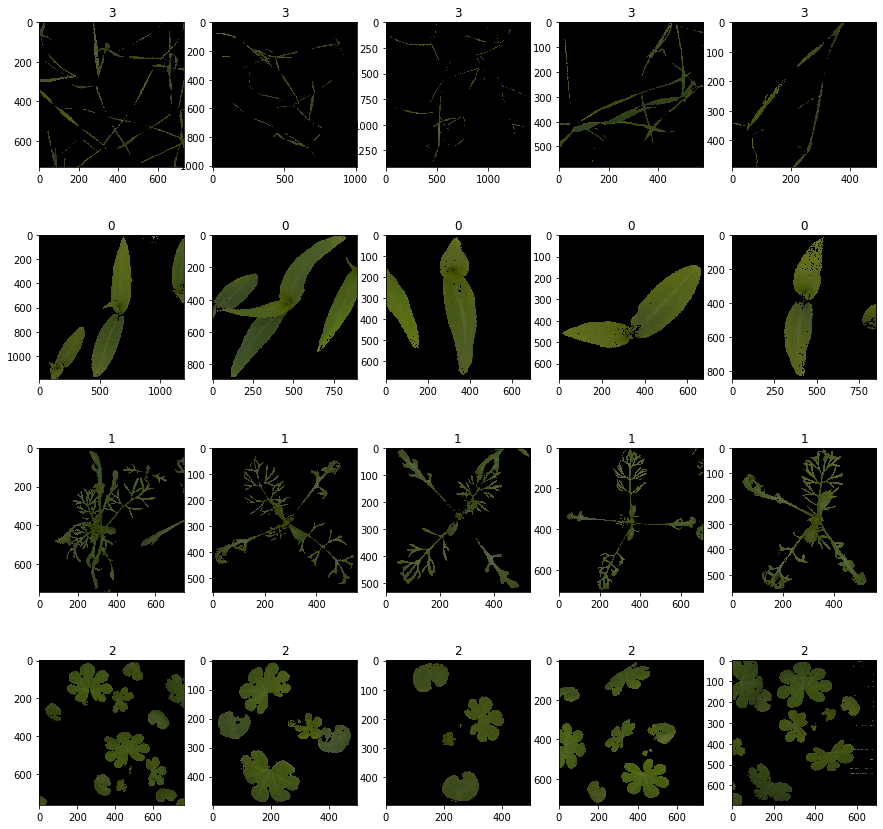

In [155]:
plt.subplots(len(train_files)//5, 5, figsize=(15,15))

for k, path in enumerate(train_files):
    image = Image.open(train_files[k])
    image.load()
    image = np.array(image)
    label = classes.index(path.parent.name)
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    mask = np.zeros_like(gray)
    
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if image[i,j,1] - 8 >= image[i,j,0] and\
                np.all(image[i,j] < 120):
                mask[i,j] = 255
            else:
                image[i,j,:] = 0
                
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5,5),np.uint8)) 
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))   
    gray = cv2.bitwise_and(mask, gray)
    
    detector = cv2.xfeatures2d.SIFT_create(nfeatures=1000, nOctaveLayers=5, contrastThreshold=0.07, \
                                       edgeThreshold=10, sigma=1.3)

    keypoints = detector.detect(image, None)
    keypoints.sort(key=lambda x: x.size, reverse=True)
    
    contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours.sort(key=len, reverse=True)
    M = cv2.moments(contours[0])
    hu = cv2.HuMoments(M)
    scale = []
    
    if np.count_nonzero(mask)/image.shape[0]/image.shape[1] > 0.12:
        stop = 2
    else:
        stop = 5
    
    for cont in contours[:stop]:
        area = cv2.contourArea(cont)
        scale = np.append(scale, area/cv2.arcLength(cont, True))
    
    plt.subplot(len(train_files)//5, 5, k+1)
    plt.imshow(image)
    plt.title(label)

../../../plants/test/ada.png 1
../../../plants/test/asd.png 2
../../../plants/test/asg.png 3
../../../plants/test/cbn.png 4
../../../plants/test/dfg.png 5
../../../plants/test/dgf.png 6
../../../plants/test/edc.png 7
../../../plants/test/esz.png 8
../../../plants/test/ety.png 9
../../../plants/test/fdf.png 10
../../../plants/test/fhj.png 11
../../../plants/test/hkl.png 12
../../../plants/test/iio.png 13
../../../plants/test/ijn.png 14
../../../plants/test/ikm.png 15
../../../plants/test/okm.png 16
../../../plants/test/qaz.png 17
../../../plants/test/qsc.png 18
../../../plants/test/qwe.png 19
../../../plants/test/rdc.png 20
../../../plants/test/rfg.png 21
../../../plants/test/rfv.png 22
../../../plants/test/rgn.png 23
../../../plants/test/sfg.png 24
../../../plants/test/tfv.png 25
../../../plants/test/tgb.png 26
../../../plants/test/tgv.png 27
../../../plants/test/tui.png 28
../../../plants/test/uhb.png 29
../../../plants/test/uhc.png 30
../../../plants/test/uiu.png 31
../../../plants/t

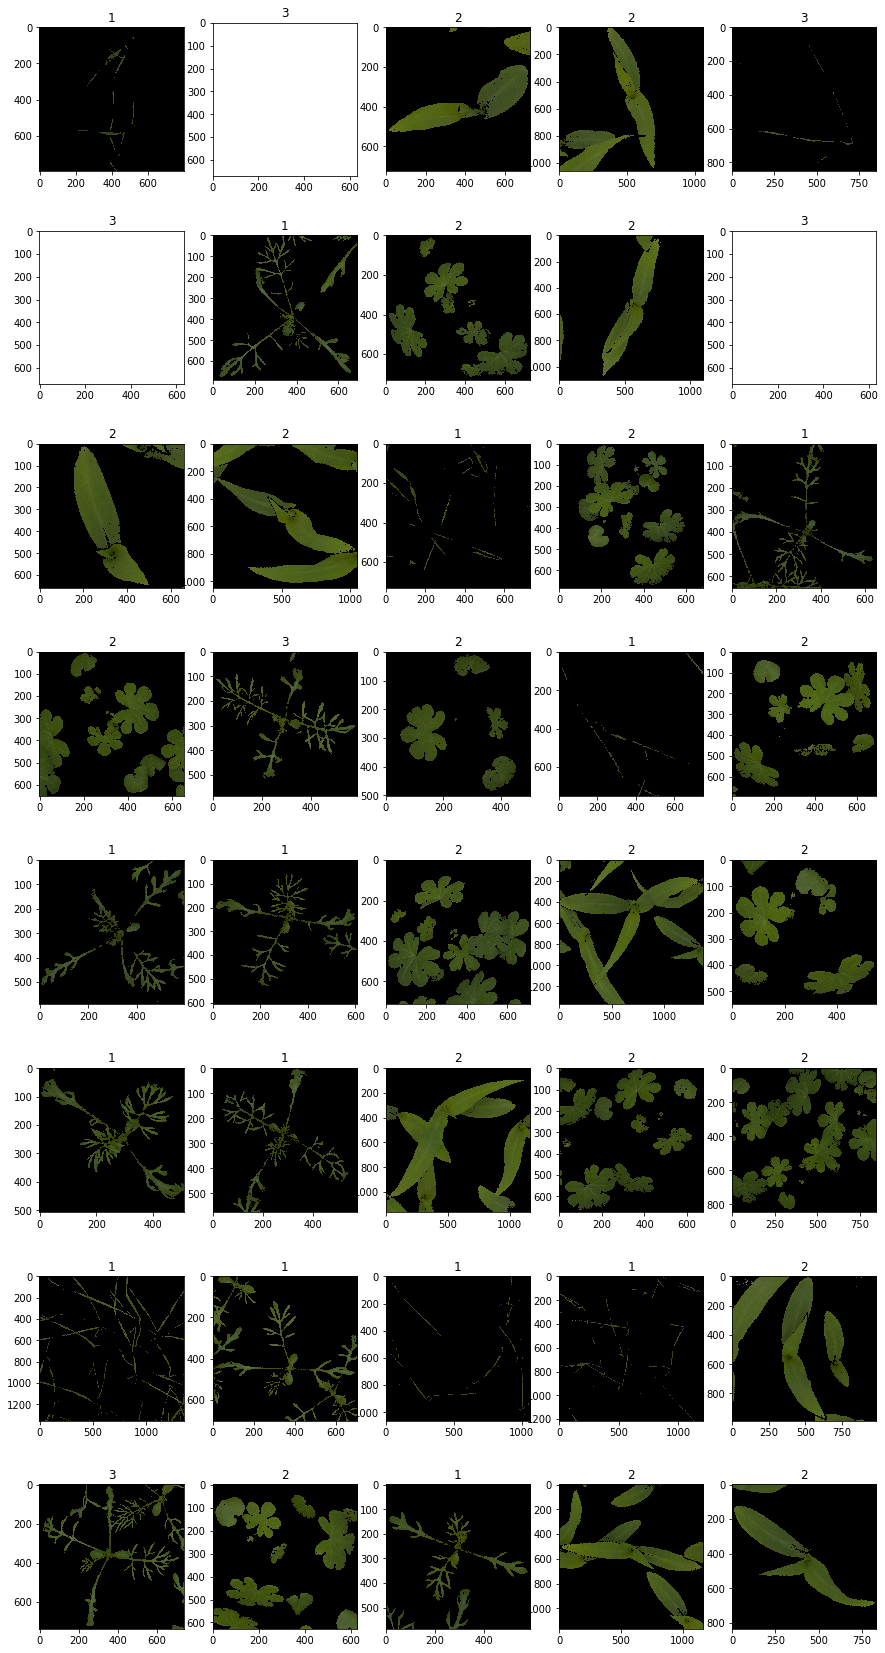

In [153]:
plt.subplots(len(test_files)//5, 5, figsize=(15,30))

for k, path in enumerate(test_files):
    image = Image.open(test_files[k])
    print(test_files[k], k+1)
    image.load()
    image = np.array(image)
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    mask = np.zeros_like(gray)
    
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if image[i,j,1] - 10 >= image[i,j,0] and\
                np.all(image[i,j] < 120):
                mask[i,j] = 255
            else:
                image[i,j,:] = 0
                
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5,5),np.uint8)) 
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))   
    gray = cv2.bitwise_and(mask, gray)
    
    detector = cv2.xfeatures2d.SIFT_create(nfeatures=1000, nOctaveLayers=5, contrastThreshold=0.07, \
                                       edgeThreshold=10, sigma=1.3)

    keypoints = detector.detect(image, None)
    keypoints.sort(key=lambda x: x.size, reverse=True)
    
    contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours.sort(key=len, reverse=True)

    if len(contours) == 0:
        label = 3
        plt.subplot(len(test_files)//5, 5, k+1)
        plt.imshow(image)
        plt.title(label)
        continue
    
    M = cv2.moments(contours[0])
    hu = cv2.HuMoments(M)
    scale = []
    
    if np.count_nonzero(mask)/image.shape[0]/image.shape[1] > 0.12:
        stop = 2
    else:
        stop = 5
    
    for cont in contours[:stop]:
        area = cv2.contourArea(cont)
        scale = np.append(scale, area/cv2.arcLength(cont, True))
        
    if hu[1] < 0.01:
        label = 2
    elif scale[0] > 20:
        label = 2
    elif np.mean(scale) > 6 or hu[6] < 1e-5:
        label = 1
    else:
        label = 3
    
    plt.subplot(len(test_files)//5, 5, k+1)
    plt.imshow(image)
    plt.title(label)